# Zomato data analysis

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataframe = pd.read_csv("Zomato data .csv")

In [17]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [18]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [19]:
dataframe['rate']=dataframe['rate'].str.split('/').str.get(0)
dataframe['rate'] = dataframe['rate'].astype(float)

In [22]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


### Type of restaurant customers order from most

Text(0.5, 0, 'Type of resturant')

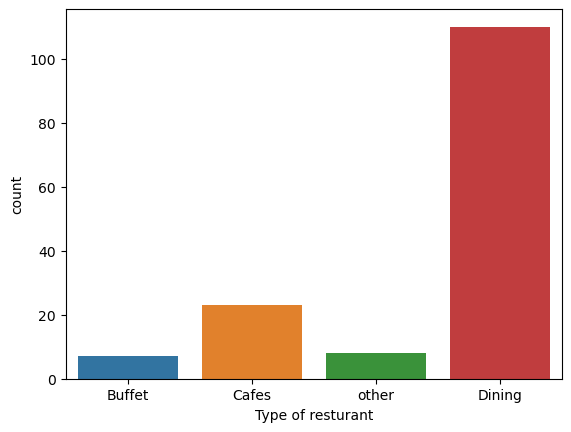

In [27]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel ("Type of resturant")

#### Conclusion: From Dinning type of resturant customers order the most

In [28]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


### Total votes by each type of reaturant

Text(0, 0.5, 'votes')

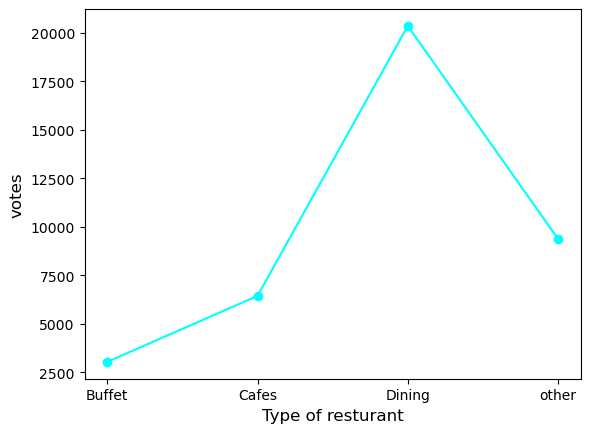

In [39]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='cyan', marker='o')
plt.xlabel('Type of resturant', c='black', size=12)
plt.ylabel('votes', c='black', size=12)

#### Conclusion: Dinning type of resturants recived maximum votes

### Resturant ratings range

In [40]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


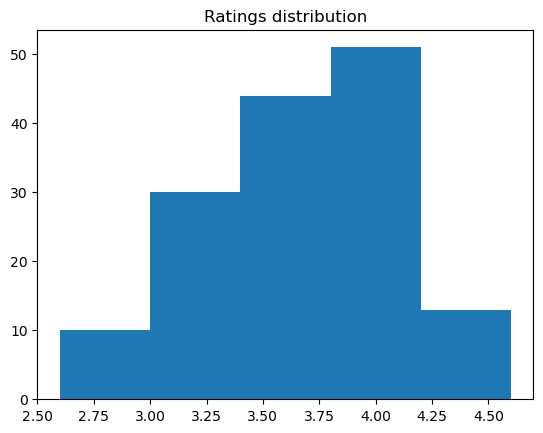

In [43]:
plt.hist(dataframe['rate'],bins =5)
plt.title('Ratings distribution')
plt.show()

#### Conclusion: maxmium rating range for majority of resturants is 3.5 to 4 which is a good performance indicator

### Average online order spending by the couples

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

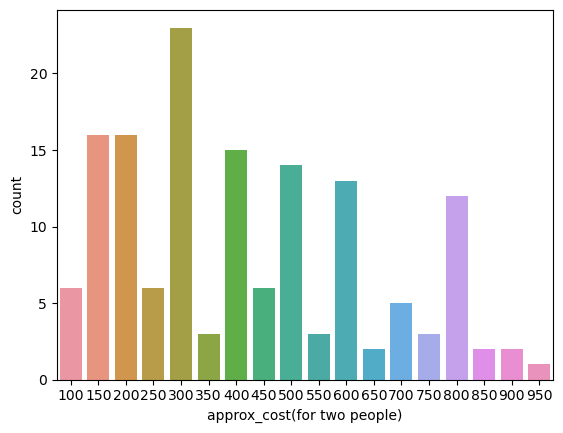

In [46]:
couple_data = dataframe ['approx_cost(for two people)']
sns.countplot(x=couple_data)

#### Conclusion: Majority of couples prefer resturants with approximate cost of 300 rupees

### Which mode recives maximum rating (Online or Offline)

<AxesSubplot:xlabel='online_order', ylabel='rate'>

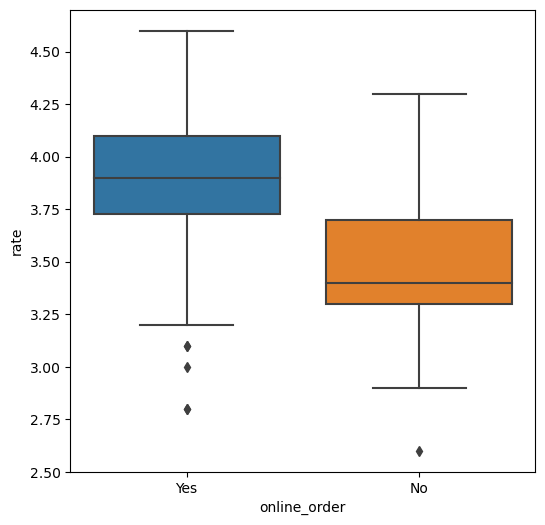

In [49]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y='rate', data=dataframe)

#### Conclusion: Offline orders recives minimum rating in comparison to offline

### Which type of resturant recived more offline orders

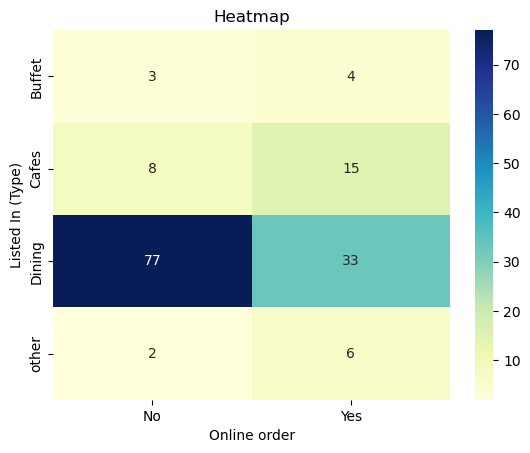

In [71]:
pivot_table = dataframe.pivot_table (index = 'listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap = 'YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Listed In (Type)')
plt.show()

#### Conclusion: Dining resturant primarily accept offline most offline orders, whereas cafes primarily recives online orders this suggest that clients prefer orders in person at resturants, but prefer online ordering at cafes.